# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

2024-05-27 07:07:02.860442: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-27 07:07:03.009364: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-27 07:07:03.618458: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Displaying Images

In [2]:
picture_size = 48
folder_path = "../data/images/"

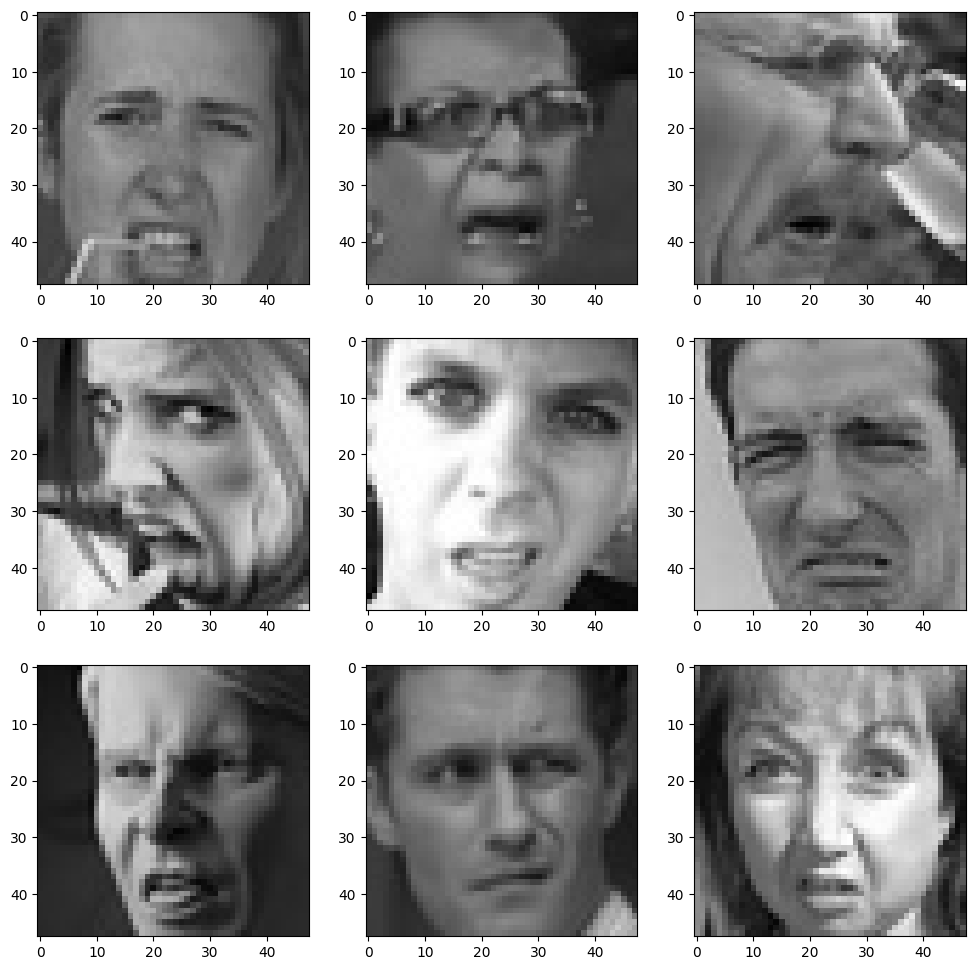

In [3]:
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

# Making Training and Validation Data

In [4]:
batch_size  = 64

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Model Building

In [5]:
from tensorflow.keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

2024-05-25 21:23:29.384792: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-25 21:23:29.406844: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-25 21:23:29.406998: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation

# Define the input shape
input_shape = (48, 48, 1)  # For grayscale images, use (48, 48, 1)

# Initialize the model
model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), padding='same', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Block 2
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Block 3
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Block 4
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Flatten the layers
model.add(Flatten())

# Fully connected layer 1
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

# Fully connected layer 2
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

# Output layer
num_classes = 7  # Adjust this based on your dataset
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_40 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_40 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 conv2d_33 (Conv2D)          (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_41 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_41 (Activation)  (None, 48, 48, 64)       

# Fitting the Model with Training and Validation Data 

In [20]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=10,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=5,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 100

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [21]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/100


/tmp/ipykernel_5020/3853974908.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,
2024-05-26 18:03:52.470676: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


  5/450 [..............................] - ETA: 6s - loss: 2.4638 - accuracy: 0.1594  

2024-05-26 18:03:52.990681: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_4/dropout_24/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


450/450 [==============================] - ETA: 0s - loss: 1.7825 - accuracy: 0.3144

2024-05-26 18:03:59.427473: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


450/450 [==============================] - 8s 15ms/step - loss: 1.7825 - accuracy: 0.3144 - val_loss: 1.6579 - val_accuracy: 0.4026 - lr: 0.0010
Epoch 2/100
450/450 [==============================] - 7s 15ms/step - loss: 1.3480 - accuracy: 0.4855 - val_loss: 1.3908 - val_accuracy: 0.4732 - lr: 0.0010
Epoch 3/100
450/450 [==============================] - 7s 15ms/step - loss: 1.2075 - accuracy: 0.5412 - val_loss: 1.1892 - val_accuracy: 0.5514 - lr: 0.0010
Epoch 4/100
450/450 [==============================] - 7s 15ms/step - loss: 1.1347 - accuracy: 0.5696 - val_loss: 1.1146 - val_accuracy: 0.5714 - lr: 0.0010
Epoch 5/100
450/450 [==============================] - 7s 15ms/step - loss: 1.0660 - accuracy: 0.5945 - val_loss: 1.1338 - val_accuracy: 0.5733 - lr: 0.0010
Epoch 6/100
450/450 [==============================] - 7s 15ms/step - loss: 1.0150 - accuracy: 0.6196 - val_loss: 1.1048 - val_accuracy: 0.5878 - lr: 0.0010
Epoch 7/100
450/450 [==============================] - 7s 16ms/step - 

# Plotting Accuracy & Loss

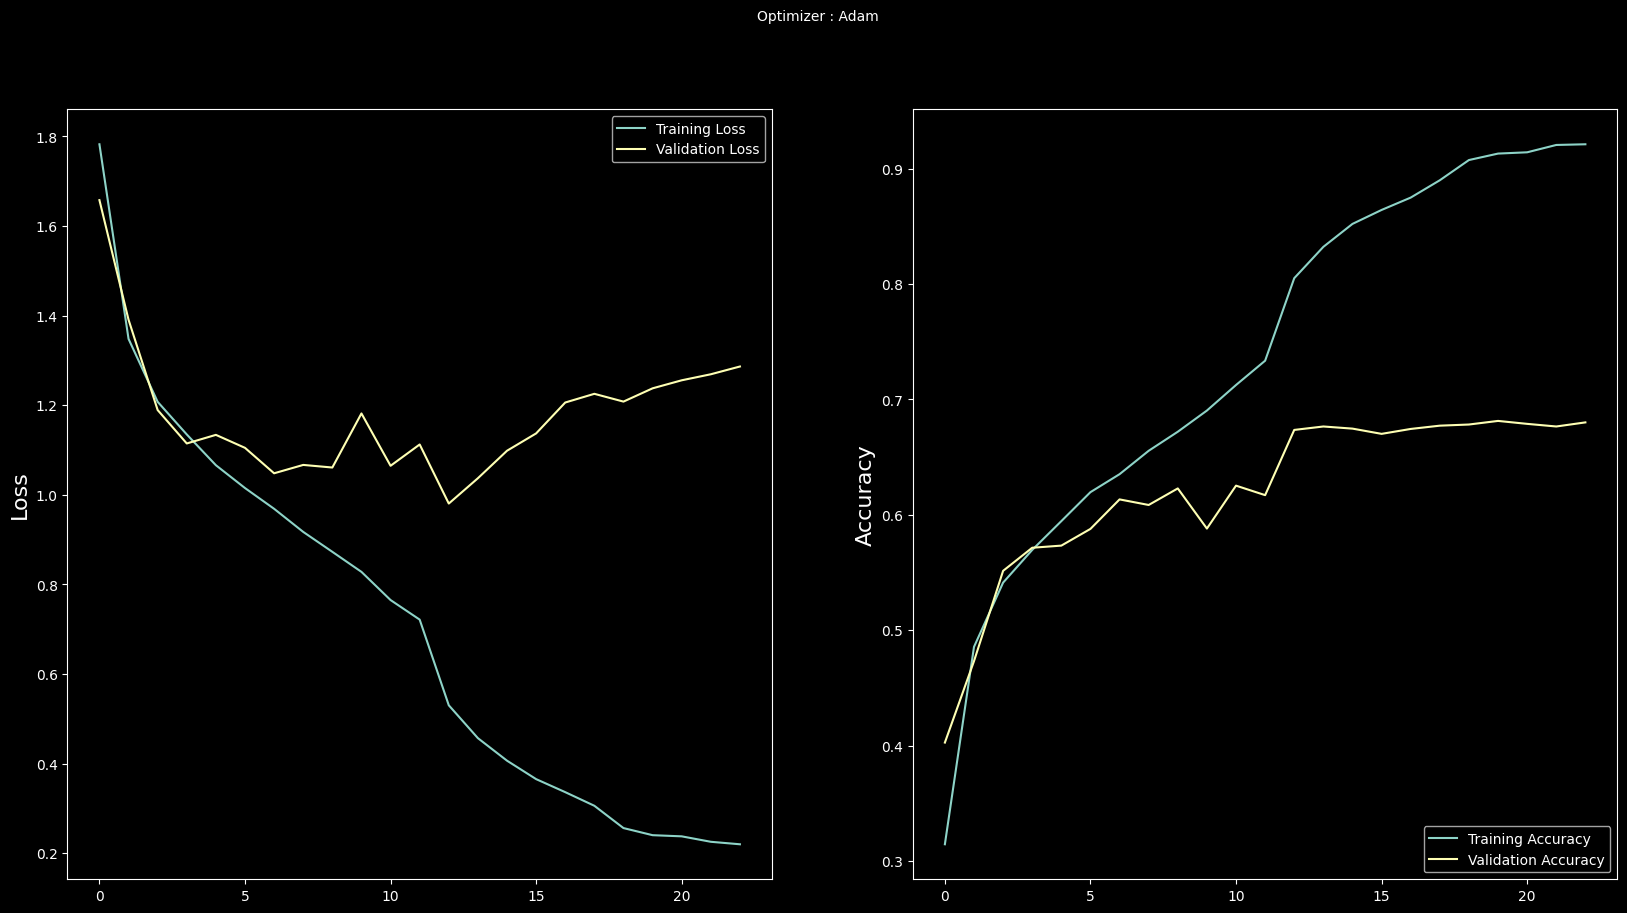

In [22]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [43]:
model.save('emotions_VGG.h5')

# Detecting face

In [65]:
import cv2
import numpy as np
import tensorflow as tf

def detect_and_crop_faces(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    cropped_faces = []
    
    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]
        face_resized = cv2.resize(face, (48, 48))
        cropped_faces.append(face_resized)
    
    return cropped_faces

def classify_faces(cropped_faces, model_path='/home/thor_01/Documents/EC/tensorflow/transfer-learning-emotions/notebooks/emotions_VGG.h5'):
    model = tf.keras.models.load_model(model_path)
    results = []
    
    for face in cropped_faces:
        #face = face / 255.0
        print(face.shape)
        face = np.expand_dims(face, axis=-1)
        print(face.shape)
        face = np.expand_dims(face, axis=0)
        print(face.shape)
        prediction = model.predict(face)
        results.append(prediction)
    
    return results


In [5]:
import cv2
import numpy as np
import tensorflow as tf

# Define the mapping dictionary
categories = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}

# Load the pre-trained model
model = tf.keras.models.load_model('/home/thor_01/Documents/EC/tensorflow/transfer-learning-emotions/notebooks/emotions_VGG.h5')

def detect_faces_and_classify(image_path, model, categories):
    # Load the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Load the Haar Cascade classifier for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    for (x, y, w, h) in faces:
        # Crop the face
        face = gray[y:y+h, x:x+w]
        # Resize the face to 48x48
        face_resized = cv2.resize(face, (48, 48))
        # Normalize the face
        #face_resized = face_resized / 255.0
        # Add channel and batch dimensions
        face_resized = np.expand_dims(face_resized, axis=-1)
        face_resized = np.expand_dims(face_resized, axis=0)
        
        # Predict the class
        prediction = model.predict(face_resized)
        class_idx = np.argmax(prediction)
        label = categories[class_idx]
        
        # Draw rectangle around the face
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        # Put label text above the rectangle
        cv2.putText(image, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    
    # Display the image with rectangles and labels
    cv2.imshow('Image', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [7]:
# Example usage
image_path = '/home/thor_01/Documents/EC/tensorflow/transfer-learning-emotions/data/images/IMG_5354.jpg'
detect_faces_and_classify(image_path, model, categories)

1/1 [==============================] - 0s 8ms/step


In [69]:
# Example usage
image_path = '/home/thor_01/Documents/EC/tensorflow/transfer-learning-emotions/data/images/BBZ-1123x0-c-default.png'
cropped_faces = detect_and_crop_faces(image_path)



In [53]:
cropped_faces

[array([[22, 19, 16, ..., 11, 12, 14],
        [23, 20, 13, ..., 10, 12, 14],
        [15, 15, 14, ..., 10,  8, 13],
        ...,
        [39, 34, 35, ..., 37, 27, 36],
        [44, 35, 34, ..., 36, 35, 38],
        [40, 32, 33, ..., 35, 33, 34]], dtype=uint8)]

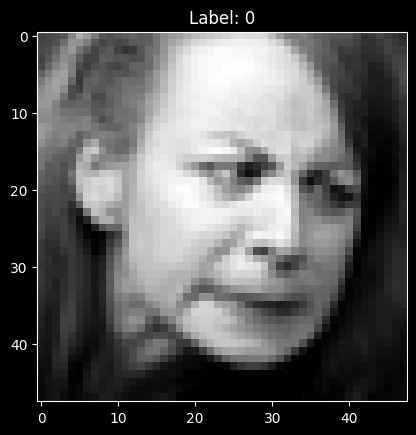

Sample image shape: (48, 48, 1)
Sample label: [1. 0. 0. 0. 0. 0. 0.]


In [58]:
# Get a batch of images and labels
test_images, test_labels = next(test_set)

# Select a specific sample (e.g., the first sample in the batch)
sample_image = test_images[0]
sample_label = test_labels[0]

# Display the sample image and label (if needed)
import matplotlib.pyplot as plt

plt.imshow(sample_image.reshape(picture_size, picture_size), cmap='gray')
plt.title(f"Label: {np.argmax(sample_label)}")
plt.show()

# Print the sample image and label
print("Sample image shape:", sample_image.shape)
print("Sample label:", sample_label)

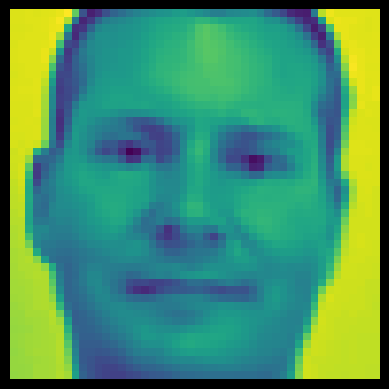

In [70]:
import matplotlib.pyplot as plt

plt.imshow(cropped_faces[0])
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [26]:
cropped_faces

[array([[124, 123, 121, ..., 100, 101, 102],
        [124, 123, 119, ..., 102, 104, 102],
        [125, 123, 120, ..., 103, 101, 103],
        ...,
        [140, 140, 139, ...,  80,  83,  82],
        [144, 145, 143, ...,  82,  79,  78],
        [145, 144, 143, ...,  79,  80,  78]], dtype=uint8),
 array([[ 71,  75, 108, ...,  97, 104, 100],
        [ 56,  62, 118, ..., 102,  99,  99],
        [ 65,  76, 123, ..., 103, 104, 105],
        ...,
        [124, 124, 128, ...,   4,   2,   2],
        [115, 113, 121, ...,   0,   1,   1],
        [105, 104, 106, ...,   1,   0,   2]], dtype=uint8),
 array([[69, 71, 76, ..., 31, 24, 17],
        [65, 69, 75, ..., 29, 21, 16],
        [64, 67, 69, ..., 27, 19, 14],
        ...,
        [54, 53, 55, ..., 95, 99, 98],
        [53, 52, 56, ..., 97, 96, 96],
        [61, 56, 56, ..., 98, 99, 96]], dtype=uint8),
 array([[58, 53, 49, ..., 74, 68, 52],
        [56, 54, 50, ..., 77, 69, 51],
        [53, 53, 53, ..., 77, 72, 59],
        ...,
        [54,

In [71]:
predictions = classify_faces(cropped_faces)
predictions

(48, 48)
(48, 48, 1)
(1, 48, 48, 1)
1/1 [==============================] - 0s 85ms/step
(48, 48)
(48, 48, 1)
(1, 48, 48, 1)
1/1 [==============================] - 0s 11ms/step
(48, 48)
(48, 48, 1)
(1, 48, 48, 1)
1/1 [==============================] - 0s 10ms/step
(48, 48)
(48, 48, 1)
(1, 48, 48, 1)
1/1 [==============================] - 0s 10ms/step
(48, 48)
(48, 48, 1)
(1, 48, 48, 1)
1/1 [==============================] - 0s 10ms/step
(48, 48)
(48, 48, 1)
(1, 48, 48, 1)
1/1 [==============================] - 0s 10ms/step
(48, 48)
(48, 48, 1)
(1, 48, 48, 1)
1/1 [==============================] - 0s 10ms/step


[array([[0.05567577, 0.02392253, 0.6154997 , 0.03510438, 0.10482075,
         0.12797928, 0.03699762]], dtype=float32),
 array([[0.10717491, 0.01367876, 0.48951128, 0.15682782, 0.03507028,
         0.12703773, 0.0706993 ]], dtype=float32),
 array([[7.88900163e-03, 2.05816832e-04, 4.46967315e-03, 9.30592060e-01,
         4.27074209e-02, 1.28364265e-02, 1.29954016e-03]], dtype=float32),
 array([[2.3397988e-02, 3.4516066e-05, 1.7085284e-02, 7.5928695e-02,
         8.2119685e-01, 6.2211242e-02, 1.4536272e-04]], dtype=float32),
 array([[0.1087483 , 0.00629851, 0.40053356, 0.00795023, 0.2314395 ,
         0.22659823, 0.01843172]], dtype=float32),
 array([[0.04908483, 0.00972543, 0.50650054, 0.33941334, 0.01748128,
         0.05545101, 0.02234355]], dtype=float32),
 array([[5.4060541e-02, 2.0532499e-04, 3.4808144e-02, 4.0227391e-02,
         8.0398613e-01, 6.5844186e-02, 8.6832605e-04]], dtype=float32)]

In [55]:
categories = {0:'angry',1:'disgust',2:'fear',3:'happy',4:'neutral',5:'sad',6:'surprise'}

# Function to map the output arrays to emotion categories
def map_predictions_to_emotions(output_arrays, categories):
    emotions = []
    for output in output_arrays:
        index = np.argmax(output)
        emotion = categories[index]
        emotions.append(emotion)
    return emotions

In [72]:
# Get the mapped emotions
mapped_emotions = map_predictions_to_emotions(predictions, categories)

# Print the results
for i, emotion in enumerate(mapped_emotions):
    print(f"Face {i+1}: {emotion}")

Face 1: fear
Face 2: fear
Face 3: happy
Face 4: neutral
Face 5: fear
Face 6: fear
Face 7: neutral
